In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing File and EDA

In [2]:
df = pd.read_csv(r"sample_data_set_2.csv")

In [3]:
df.head()

,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks
0,08 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3932330,3926253,99.9%,3849749,98.1%,10199,0
1,08 Sep 2020,(SDK X) Cricket Mazza,320x50,Unresolved,0.0,3932330,119,99.9%,118,99.2%,2,2
2,08 Sep 2020,(SDK X) Cricket Mazza,Dream11_320x50,Unresolved,0.0,3932330,96,99.9%,93,96.9%,2,2
3,08 Sep 2020,(SDK X) Cricket Mazza,My11_320x50,Unresolved,0.0,3932330,111,99.9%,110,99.1%,2,2
4,06 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3839002,3834328,99.9%,3785127,98.7%,9492,0


In [4]:
df.dtypes

Date             object
App              object
Ad Group         object
State            object
Revenue         float64
Ad Requests       int64
Ad Responses      int64
Fill Rate        object
Impressions       int64
Render Rate      object
1st Clicks        int64
2nd Clicks        int64
dtype: object

In [5]:
##Explicitly converting certain data types for further analysis
df['Date'] = pd.to_datetime(df['Date'])

aa = []
bb = []
for a in df['Fill Rate']:
    aa.append(a[:-1])
for b in df['Render Rate']:
    bb.append(b[:-1])

df['Fill Rate'] = aa
df['Render Rate'] = bb
df['Fill Rate'] = pd.to_numeric(df['Fill Rate'])
df['Render Rate'] = pd.to_numeric(df['Render Rate'])

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Revenue,48293.0,0.071920,0.728748,0.0,0.0,0.00,0.0,42.39
Ad Requests,48293.0,76542.923177,343786.308751,0.0,31.0,334.00,6170.0,3932330.00
Ad Responses,48293.0,4921.321082,55915.746146,0.0,2.0,15.00,178.0,3926253.00
Fill Rate,48293.0,91.148917,27.815244,0.0,99.9,100.00,100.0,150.00
Impressions,48293.0,4319.299112,52445.631553,0.0,1.0,8.00,103.0,3849749.00
Render Rate,48293.0,62.826781,38.456473,0.0,29.0,79.41,96.6,533.00
1st Clicks,48293.0,112.089040,695.681842,0.0,0.0,0.00,5.0,25141.00
2nd Clicks,48293.0,30.091587,185.729236,0.0,0.0,0.00,2.0,6323.00


In [ ]:
## As we can see that the standard deviation is too large. Thus, the distribution is extremely varied to perform any
## transformations. Consequently, it is difficult to find any accurate conclusion at this moment.

In [7]:
# Cleaning the Data

## Calculating percentage of null values in each column
df[df.columns].isnull().sum() * 100 / df.shape[0]

Date            0.000000
App             0.047626
Ad Group        8.268279
State           0.000000
Revenue         0.000000
Ad Requests     0.000000
Ad Responses    0.000000
Fill Rate       0.000000
Impressions     0.000000
Render Rate     0.000000
1st Clicks      0.000000
2nd Clicks      0.000000
dtype: float64

In [8]:
## Dropping null values instead of imputation as these make less than 10% of the total data
df.dropna(inplace = True)

In [9]:
df.shape

(44277, 12)

In [10]:
## Check for any duplicated rows in the data
df.duplicated().sum()

18

In [11]:
## Removing the dupicated data
bool_series = df.duplicated(keep='first')
df = df[~bool_series]

In [12]:
## Attempt to clear data of the outliers and reduce standard deviation

num_cols = [
    'Revenue', '1st Clicks', '2nd Clicks',
    'Ad Requests', 'Ad Responses', 'Impressions'
]

outliers_df = pd.DataFrame(columns=df.columns)

for col in num_cols:
    stat = df[col].describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 2 * IQR
    lower = stat['25%'] - 2 * IQR
    
    outliers = df[(df[col] > upper) | (df[col] < lower)]

    if not outliers.empty:
        print(f'\nOutlier found in: {col}, {len(outliers)}')
        outliers_df = pd.concat([outliers_df, outliers])
    else:
        print(f'\nNo outlier found in: {col}')

    print(f'\nSuspected Outliers Lower Bound: {lower}')
    print(f'Suspected Outliers Upper Bound: {upper}\n\n')

print(f'Number of outlier rows: {len(outliers_df)}')

del outliers

count    44259.000000
mean         0.078475
std          0.760898
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         42.390000
Name: Revenue, dtype: float64

Outlier found in: Revenue, 5833

Suspected Outliers Lower Bound: 0.0
Suspected Outliers Upper Bound: 0.0


count    44259.000000
mean       122.305429
std        725.835078
min          0.000000
25%          0.000000
50%          0.000000
75%          7.000000
max      25141.000000
Name: 1st Clicks, dtype: float64

Outlier found in: 1st Clicks, 8022

Suspected Outliers Lower Bound: -14.0
Suspected Outliers Upper Bound: 21.0


count    44259.000000
mean        32.834294
std        193.776810
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max       6323.000000
Name: 2nd Clicks, dtype: float64

Outlier found in: 2nd Clicks, 7274

Suspected Outliers Lower Bound: -6.0
Suspected Outliers Upper Bound: 9.0


count    4.425900e+04
mean     8.320942e+0

In [ ]:
## Since almost all the data is tagged as outlier. This method fails.

In [14]:
## An attempt to pick only the rightly mapped values from the data

rightFieldsOnly = pd.DataFrame(columns = df.columns)
dff = df
fillRate = df["Ad Responses"]/df['Ad Requests']*100
right = dff[(dff['Fill Rate'] <= np.floor(fillRate) + 1) & (dff['Fill Rate'] >= np.floor(fillRate) - 1)]

In [15]:
len(right)

3407

In [ ]:
## Since this will leave us with with less than 1% of the total data. Therefore, this method also fails.

In [16]:
rightFieldsOnly = pd.concat([rightFieldsOnly, right])
dff = rightFieldsOnly 
dff.head()

,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks
0,2020-09-08,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3932330,3926253,99.9,3849749,98.10,10199,0
4,2020-09-06,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3839002,3834328,99.9,3785127,98.70,9492,0
801,2020-09-10,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,1711242,1643777,96.1,1573129,95.70,5039,0
1135,2020-09-11,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,1191146,985268,82.8,829772,84.22,3867,0
1249,2020-09-11,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Telangana,0.0,794639,780350,98.3,764472,98.00,2315,0


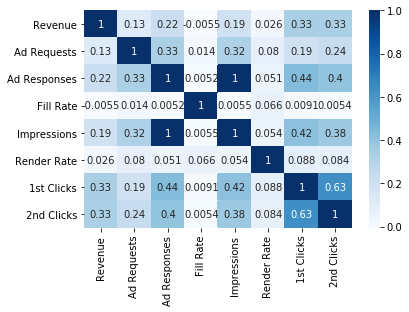

In [17]:
## Checking for a general relation between variables
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [ ]:
"""From the above figure we can conclude that there is no major correlation between variables.
But we can also see that Revenue generated is mostly influenced by the 1st and 2nd clicks. This goes good with the hypothesis.
The Ad Responses and Fill Rate are highly correlated which is self-explanatory as both are linked."""

In [18]:
objects = set(df.select_dtypes(include = ['object']).columns)
df[objects].describe()

,State,Ad Group,App
count,44259,44259,44259
unique,36,188,116
top,Unresolved,revshare,Callbreak Multiplayer
freq,2432,6123,3767


In [19]:
pd.crosstab(df['State'], columns='count').sort_values('count', ascending=False).head(10)

col_0,count
State,
Unresolved,2432
Karnataka,2315
Tamil Nadu,2259
Maharashtra,2062
Kerala,1926
Telangana,1758
Gujarat,1712
Uttar Pradesh,1693
Delhi,1675


In [20]:
pd.crosstab(df['App'], columns='count').sort_values('count', ascending=False).head(10)

col_0,count
App,
Callbreak Multiplayer,3767
World Cricket Championship 2,3270
Bottle Shooting Game,2320
World Cricket Championship Lt,1857
Indian Rummy Offline,1612
Mindi Offline,1456
Battle of chepauk,1165
PocketLeague,958
Shiva Winter Biking Tales,942


In [21]:
state_df = df.groupby(df['State'])

In [22]:
state_df.mean()

,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks
State,,,,,,,,
12096464,0.000000,191.795977,32.031609,99.376437,27.893678,71.346983,1.563218,0.244253
Andaman and Nicobar,0.000000,67.982456,12.592982,98.907719,10.526316,70.467614,0.245614,0.087719
Andhra Pradesh,0.026595,12152.215134,1689.608309,99.792285,1548.479970,68.395868,39.265579,20.206973
Arunachal Pradesh,0.000082,1515.085526,186.819079,99.851151,165.373355,68.085592,2.307566,0.648026
Assam,0.026180,59425.925816,3634.813798,99.606083,3198.110534,68.663168,69.551187,34.028190
Bihar,0.116941,234714.721185,12469.452672,99.561816,11097.541533,68.272067,260.804250,71.775918
Chandigarh,0.007830,6193.445276,882.760524,99.834331,784.942937,70.349710,33.102900,7.364827
Chhattisgarh,0.018174,23328.867356,2096.332472,99.659604,1908.586563,69.024556,39.996555,10.434970
Delhi,0.144591,197104.013134,14503.972537,99.200896,13214.274030,67.278967,273.180299,65.691343


In [32]:
## After grouping data state-wise we can find the highest revenue generating states as below.
ss = state_df['Revenue'].sum()
ss.sort_values(ascending =False).head(10)

State
Unresolved        738.38
Karnataka         362.51
Maharashtra       346.33
Delhi             242.19
Uttar Pradesh     226.13
Rajasthan         198.87
Gujarat           198.06
Bihar             181.61
Madhya Pradesh    181.07
West Bengal       145.74
Name: Revenue, dtype: float64

In [33]:
app_df = df.groupby(df['App'])

In [34]:
app_df.describe()

Revenue            \
                                                     count      mean   
App                                                                    
(SDK X) Cricket Mazza                                876.0  0.039224   
12611047                                               3.0  0.000000   
39052237                                               2.0  0.000000   
4 Digit Code                                         800.0  0.000075   
86507421                                               3.0  0.000000   
96718048                                               2.0  0.000000   
Amazing Strange Rope Police - Vice Spider Vegas       25.0  0.000000   
AppBrowzer                                           518.0  0.000270   
Baba Cric                                            747.0  0.000000   
Bangla Panjika (বাংলা পঞ্জিকা) 2020 Calendar-1427    250.0  0.127360   
Barcod Scanner                                       197.0  0.000000   
Battle of chepauk                                   1165.0  0.018970   
Bhuvneshwar Kumar: Official Cricket Game              20.0  0.000000   
Blackboard Edutech                                     1.0  0.000000   
Bottle Shooting Game                                2320.0  0.324953   
Brain Games                                          249.0  0.000000   
Bus Simulator Indonesia                              831.0  0.010758   
Bus Simulator Mobile                                  15.0  0.000000   
Calculator vault                                     419.0  0.000000   
Callbreak Multiplayer                               3767.0  0.230794   
Car Racing On Impossible Tracks                       43.0  0.000000   
City Car Racing Simulator 2018                       690.0  0.004435   
Corona Tracker                                        50.0  0.000800   
Counter Rivals Online                                 53.0  0.000000   
Cricket Box Fastest Live Line & Cricket Scores        16.0  0.000000   
DEUL                                                   3.0  0.000000   
Demolition Derby 2                                   279.0  0.000287   
Dinosaur Simulator: Dino World                        46.0  0.000000   
Doctor Dash : Hospital Game                           27.0  0.001111   
EPF Balance Check PF Balance & Passbook              152.0  0.000000   
...                                                    ...       ...   
SDK X Native Sample                                   46.0  0.000000   
Sachin Saga Cricket Champions                         13.0  0.000000   
San Andreas Crime Stories                            114.0  0.000000   
Shiva Archery                                        828.0  0.001365   
Shiva Cycling Adventure                              863.0  0.002966   
Shiva Winter Biking Tales                            942.0  0.024660   
Shortpedia                                             4.0  0.000000   
Skymet Weather                                       682.0  0.019531   
Sling Kong                                           131.0  0.000000   
Snake and Ladder                                     467.0  0.000021   
Spider Simulator: Amazing City                       138.0  0.000000   
StadtLandFluss (Unity)                                18.0  0.000000   
Sticker Maker                                        649.0  0.095455   
Talk Now – Audio Chat to English speaking practice   575.0  0.106939   
Tarot Cards Reading and Numerology App               163.0  0.606503   
Telugu Calendar                                      180.0  0.000000   
Tips for ZOOM Cloud Meetings Video Conferences        21.0  0.000000   
Town Talk                                             15.0  0.000000   
Traffic Bangalore: Check Fines                       358.0  0.783045   
VR Thrills                                            27.0  0.000000   
Vehicle Owner Details                                140.0  0.003429   
WCC Lite                                             844.0  0.000000   
Wild Animal Zoo Cit

In [53]:
aa = app_df['Revenue'].sum()/app_df['Ad Requests'].sum()*1000
aa.sort_values(ascending = False).head(10)

App
Tarot Cards Reading and Numerology App               1.475588
Nursing Exam                                         0.353824
Traffic Bangalore: Check Fines                       0.156511
Corona Tracker                                       0.109290
Guru Cric                                            0.100148
Bangla Panjika (বাংলা পঞ্জিকা) 2020 Calendar-1427    0.078991
Vehicle Owner Details                                0.075961
Sticker Maker                                        0.071907
NEXPLAY(SDK-X) - Mobile Live Streaming               0.057900
Doctor Dash : Hospital Game                          0.030928
dtype: float64

In [ ]:
a_req = app_df['Ad Requests']
a_rev = app_df['Revenue']
a_rev.sort_values(ascending = False).head(10)

In [45]:
df2 = df.groupby(['App', 'State', 'Ad Group']).sum()

In [47]:
df2.head(100)

Revenue  \
App                    State               Ad Group                              
(SDK X) Cricket Mazza  12096464            320x50                         0.00   
                                           Cricket Mazza Banner (AdX)     0.00   
                                           Dream11_320x50                 0.00   
                                           My11_320x50                    0.00   
                       Andaman and Nicobar 320x50                         0.00   
                                           Cricket Mazza Banner (AdX)     0.00   
                                           Dream11_320x50                 0.00   
                                           My11_320x50                    0.00   
                       Andhra Pradesh      320x50                         0.22   
                                           Cricket Mazza Banner (AdX)     0.00   
                                           Dream11_320x50                 0.00   
                                           My11_320x50                    0.00   
                       Arunachal Pradesh   320x50                         0.00   
                                           Cricket Mazza Banner (AdX)     0.00   
                                           Dream11_320x50                 0.00   
                                           My11_320x50                    0.00   
                       Assam               320x50                         0.08   
                                           Cricket Mazza Banner (AdX)     0.00   
                                           Dream11_320x50                 0.00   
                                           My11_320x50                    0.00   
                       Bihar               320x50                         0.23   
                                           Cricket Mazza Banner (AdX)     0.00   
                                           Dream11_320x50                 0.00   
                                           My11_320x50                    3.96   
                       Chandigarh          320x50                         0.02   
                                           Cricket Mazza Banner (AdX)     0.00   
                                           Dream11_320x50                 0.00   
                                           My11_320x50                    0.00   
                       Chhattisgarh        320x50                         0.05   
                                           Cricket Mazza Banner (AdX)     0.00   
...                                                                        ...   
                       Madhya Pradesh      Cricket Mazza Banner (AdX)     0.00   
                                           Dream11_320x50                 0.00   
                                           My11_320x50                    1.32   
                       Maharashtra         320x50                         0.32   
                                           Cricket Mazza Banner (AdX)     0.00   
                                           Dream11_320x50                 1.22   
                                           My11_320x50                    1.32   
                       Manipur             320x50                         0.00   
                                           Cricket Mazza Banner (AdX)     0.00   
                                           Dream11_320x50                 0.00   
                                           My11_320x50                    0.00   
                       Meghalaya           320x50                         0.00   
                                           Cricket Mazza Banner (AdX)     0.00   
                                           Dream11_320x50                 0.00   
                                           My11_320x50                    0.00   
                       Mizoram             320x50                         0.00   
                                           Cricket Ma

## Visualizations

In [ ]:
## The pairplot below, describes the inter group relationship. The 1st click is the trigger point to generate customer
## leads but revenue is generated after certain successful clicks. This plot shows how revenue generation is connected with
## other column features.

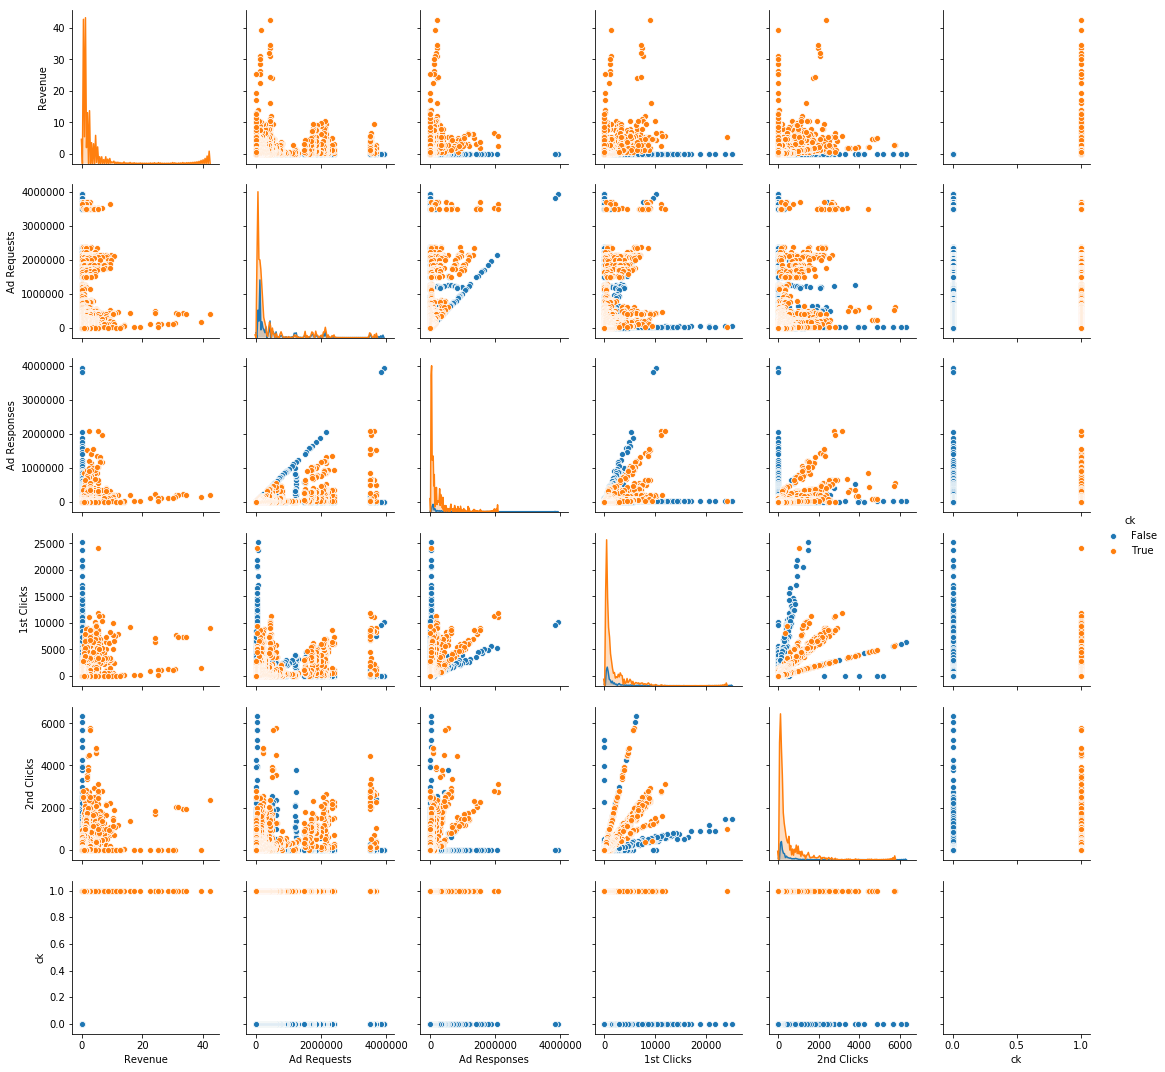

In [73]:
ck = (df['Revenue'] > 0)
df['ck'] = ck
sns.pairplot(df[['Revenue', 'Ad Requests', 'Ad Responses', '1st Clicks', '2nd Clicks', 'ck']], hue = 'ck')

In [ ]:
## This scatterplot can be used to reaffirm the positive correlation between revenue and 1st Clicks.

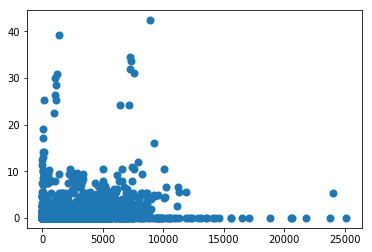

In [65]:
x = df['1st Clicks']
y = df['Revenue']

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, linewidth=2.0)

##ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
##       ylim=(0, 8), yticks=np.arange(1, 8))
plt.show()

In [ ]:
## This plot is showing how the rendering of ads does not guarantee lead generation.
## This can be used over each ad group (too slow on my system) to determine the efficacy of the content.

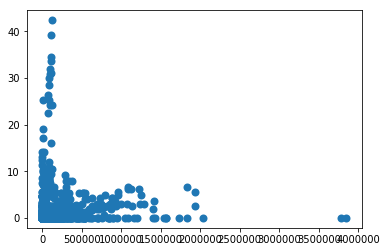

In [66]:
x = df['Impressions']
y = df['Revenue']

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, linewidth=2.0)
#ax.set(ylim=(0, ), yticks=np.arange(1, 8))

plt.show()

In [ ]:
## Since the time frame of the given data is too small therefore time-series analysis will not be fruitful in the present scenario.